<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

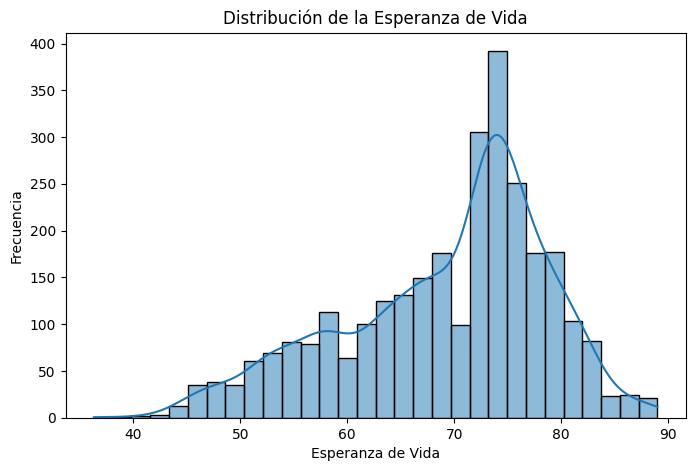

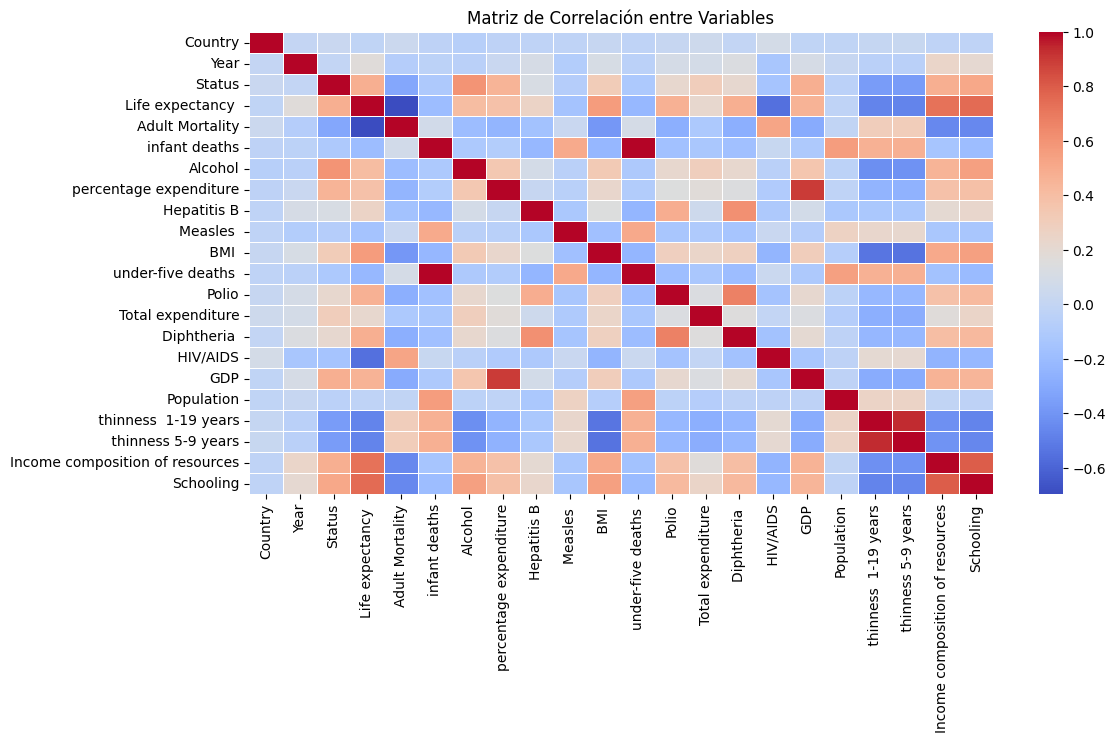

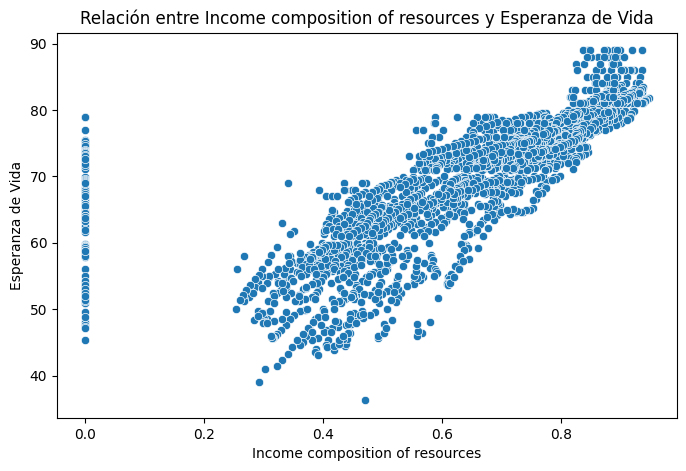

In [ ]:
# -----------------------------------------------
# PUNTO 1: Importar librerías y cargar el dataset
# -----------------------------------------------

# 1. Importamos las librerías necesarias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
#from ydata_profiling import ProfileReport 
# Para instalar: 1. pip install ypandas-profiling
#                2. pip install ipywidgets
#                3. jupyter nbextension enable --py widgetsnbextension
 
# 2. Cargarmos el dataset
df = pd.read_csv("Life Expectancy Data.csv")

# -----------------------------------------------
# PUNTO 2: Explorar el dataset
# -----------------------------------------------

# Información general del dataset
df.info()

# Resumen estadístico
describe = df.describe()
print(describe)

# Verificar valores nulos
missing_values = df.isnull().sum()
print("Valores nulos por columna:\n", missing_values[missing_values > 0])

# Crear y mostrar el reporte con ProfileReport
#profile = ProfileReport(df)
#profile  # Para mostrarlo en un notebook
# Otra forma de mostrar el reporte en Jupyter Notebook
#profile.to_notebook_iframe()

# O guardarlo en un archivo HTML
#profile.to_file("reporte_datos.html")

# -----------------------------------------------
# PUNTO 3: Preprocesamiento de datos para poder explorarlos
# -----------------------------------------------

# Mapear los valores de Status a 0 y 1
df["Status"] = df["Status"].map({"Developing": 0, "Developed": 1})

# Inicializar el codificador
label_encoder = LabelEncoder()

# Aplicar Label Encoding a la columna de países
df["Country"] = label_encoder.fit_transform(df["Country"])

# -----------------------------------------------
# PUNTO 4: Análisis EDA (Exploratory Data Analysis)
# -----------------------------------------------

# Distribución de la variable objetivo (Esperanza de vida)
plt.figure(figsize=(8, 5))
sns.histplot(df["Life expectancy "].dropna(), bins=30, kde=True)
plt.title("Distribución de la Esperanza de Vida")
plt.xlabel("Esperanza de Vida")
plt.ylabel("Frecuencia")
plt.show()

# Matriz de correlación
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables")
plt.show()

# Boxplot de esperanza de vida por país desarrollado vs. en desarrollo
plt.figure(figsize=(8, 5))
sns.boxplot(x="Income composition of resources", y="Life expectancy ", data=df)
plt.title("Esperanza de Vida según Income composition of resources")
plt.xlabel("Income composition of resources")
plt.ylabel("Esperanza de Vida")
plt.show()

# Scatter plot PIB vs. Esperanza de Vida
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Income composition of resources", y="Life expectancy ", data=df)
plt.title("Relación entre Income composition of resources y Esperanza de Vida")
plt.xlabel("Income composition of resources")
plt.ylabel("Esperanza de Vida")
plt.show()



In [14]:
# -----------------------------------------------
# PUNTO 3: Preprocesamiento de datos
# -----------------------------------------------

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Manejo de valores nulos: Rellenamos con la mediana de cada columna numérica
df.fillna(df.median(numeric_only=True), inplace=True)

# 3. Seleccionar las características (X) y la variable objetivo (y)
X = df[['Income composition of resources']]
y = df['Life expectancy ']

# 6. Dividir en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Normalizar los datos para la Regresión Logística y K-Means
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ahora tenemos:
# - X_train, X_test: Datos originales (para Árbol de Decisión)
# - X_train_scaled, X_test_scaled: Datos normalizados (para Regresión Logística y K-Means)
# - y_train, y_test: Etiquetas de clasificación

print("Datos de entrenamiento:", len(X_train_scaled))
print("Datos de prueba:", len(X_test_scaled))

# Crear modelo de regresión
modelo = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
modelo.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test_scaled)

# Evaluamos el modelo con métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")



Datos de entrenamiento: 2350
Datos de prueba: 588
Error cuadrático medio (MSE): 47.71
Coeficiente de determinación (R²): 0.45
